In [1]:
import numpy as np # linear algebra - is for nerds.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
#read in master dataset
df = pd.read_csv('C:/Users/jgles/dawg/Analysis/CFB_Dataset_PROD.csv')
df

,TS_ID,Team,Season,Conference,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,...,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153
0,1,Akron,2013,MAC,12,5,7,106,837,4104,...,21,-2,-0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Alabama,2013,SEC,13,11,2,33,826,5903,...,17,2,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arizona,2013,Pac-12,13,8,5,31,1030,5960,...,18,4,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Arizona St.,2013,Pac-12,14,10,4,32,1102,6402,...,18,15,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Arkansas,2013,SEC,12,3,9,99,775,4286,...,23,-9,-0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,West Virginia,2020,Big 12,9,5,4,42,690,3804,...,9,3,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,967,Western Ky.,2020,C-USA,11,5,6,120,699,3200,...,12,-3,-0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,968,Western Mich.,2020,MAC,6,4,2,15,392,2878,...,6,-3,-0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,969,Wisconsin,2020,Big Ten,6,3,3,93,431,2153,...,11,-3,-0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# There are some extra columns that we drop here.

#df = df.drop(['Unnamed: 147',
# 'Unnamed: 148',
# 'Unnamed: 149',
# 'Unnamed: 150',
# 'Unnamed: 151',
# 'Unnamed: 152'],
#       axis = 1)

# Since we are exploring just the 2020 Season, we will filter and keep all the teams from 2020.

is_2020 = df['Season'] == 2020
print(is_2020.head())

df20 = df[is_2020]
df20.head()

0    False
1    False
2    False
3    False
4    False
Name: Season, dtype: bool


,TS_ID,Team,Season,Conference,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,...,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153
843,844,Air Force,2020,Mountain West,6,3,3,73,373,2336,...,8,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,845,Akron,2020,MAC,6,1,5,121,360,1687,...,9,-3,-0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,846,Alabama,2020,SEC,11,11,0,5,764,5983,...,11,10,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,847,App State,2020,Sun Belt,12,9,3,26,845,5424,...,17,1,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,848,Arizona,2020,Pac-12,5,0,5,86,373,1847,...,12,-9,-1.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Avg Rank and Yard Diff Per Play

There are two statistics that we want to derive and track throughout time.

Through the original analysis, the <Average Rank> and **Net Yards Per Play** appeared to be powerful predictive metrics.  We will investigate here whether or not they hold predictive power throughout time.
    
We calculate those stats here.

In [4]:
df = df20
df['Avg Rank']=(df['Off.Rank']+df['Def.Rank'])/2
df['Net Yards Per Play']=df['Off.Yards.Play'] - df['Yards.Play.Allowed']
df['winpct']=df['Win'] / df['Games']
df.head()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,TS_ID,Team,Season,Conference,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,...,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Avg Rank,Net Yards Per Play,winpct
843,844,Air Force,2020,Mountain West,6,3,3,73,373,2336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.5,1.20,0.500000
844,845,Akron,2020,MAC,6,1,5,121,360,1687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.5,-2.87,0.166667
845,846,Alabama,2020,SEC,11,11,0,5,764,5983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2.79,1.000000
846,847,App State,2020,Sun Belt,12,9,3,26,845,5424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1.48,0.750000
847,848,Arizona,2020,Pac-12,5,0,5,86,373,1847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,-1.79,0.000000


In [5]:
list(df)

['TS_ID',
 'Team',
 'Season',
 'Conference',
 'Games',
 'Win',
 'Loss',
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attempt',
 'Yards.Completion',
 'Pass.Touchdowns',
 'Pas

In [6]:
data = df[['TS_ID',
'Team',
 'Conference',
 'Games',
 'Win',
 'Loss',
 'winpct',          
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attempt',
 'Yards.Completion',
 'Pass.Touchdowns',
 'Pass.Yards.Per.Game',
 'Pass.Def.Rank',
 'Opp.Completions.Allowed',
 'Opp.Pass.Attempts',
 'Opp.Pass.Yds.Allowed',
 'Opp.Pass.TDs.Allowed',
 'Yards.Attempt.Allowed',
 'Yards.Completion.Allowed',
 'Pass.Yards.Per.Game.Allowed',
 'Penalty.Rank',
 'Penalties',
 'Penalty.Yards',
 'Penalty.Yards.Per.Game',
 'Punt.Return.Rank',
 'Punt.Returns',
 'Net.Punt.Return.Yards',
 'Punt.Return.Touchdowns',
 'Avg.Yards.Per.Punt.Return',
 'Punt.Return.Def.Rank',
 'Opp.Punt.Returns',
 'Opp.Net.Punt.Return.Yards',
 'Opp.Punt.Return.Touchdowns.Allowed',
 'Avg.Yards.Allowed.per.Punt.Return',
 'Redzone.Off.Rank',
 'Redzone.Attempts',
 'Redzone.Rush.TD',
 'Redzone.Pass.TD',
 'Redzone.Field.Goals.Made',
 'Redzone.Scores',
 'Redzone.Points',
 'Redzone.Def.Rank',
 'Opp.Redzone.Attempts',
 'Opp.Redzone.Rush.TD.Allowed',
 'Opp.Redzone.Pass.Touchdowns.Allowed',
 'Opp.Redzone.Field.Goals.Made',
 'Opp.Redzone.Scores',
 'Redzone.Points.Allowed',
 'Rushing.Off.Rank',
 'Rush.Attempts',
 'Rush.Yds',
 'Yards.Rush',
 'Rushing.TD',
 'Rushing.Yards.per.Game',
 'Rushing.Def.Rank',
 'Opp.Rush.Attempts',
 'Opp.Rush.Yards.Alloweed',
 'Yds.Rush.Allowed',
 'Opp.Rush.Touchdowns.Allowed',
 'Rush.Yards.Per.Game.Allowed',
 'Sack.Rank',
 'Sacks',
 'Sack.Yards',
 'Average.Sacks.per.Game',
 'Scoring.Def.Rank',
 'Touchdowns.Allowed',
 'Opponent.Extra.Points',
 'X2.Point.Conversions.Allowed',
 'Opp.Deflected.Extra.Points',
 'Opp.Feild.Goals.Made',
 'Opp.Safety',
 'Points.Allowed',
 'Avg.Points.per.Game.Allowed',
 'Scoring.Off.Rank',
 'Touchdowns',
 'PAT',
 'X2.Point.Conversions',
 'Defensive.Points',
 'Feild.Goals',
 'Safety',
 'Total.Points',
 'Points.Per.Game',
 'Tackle.for.Loss.Rank',
 'Solo.Tackle.For.Loss',
 'Assist.Tackle.For.Loss',
 'Tackle.for.Loss.Yards',
 'Total.Tackle.For.Loss',
 'Tackle.For.Loss.Per.Game',
 'X3rd.Down.Rank',
 'X3rd.Attempts',
 'X3rd.Conversions',
 'X3rd.Percent',
 'X3rd.Down.Def.Rank',
 'Opp.3rd.Conversion',
 'Opp.3rd.Attempt',
 'Opponent.3rd.Percent',
 'Time.of.Possession.Rank',
 'Average.T.O.P',
 'Turnover.Rank',
 'Fumbles.Recovered',
 'Opponents.Intercepted',
 'Turnovers.Gain',
 'Fumbles.Lost',
 'Interceptions.Thrown.y',
 'Turnovers.Lost',
 'Turnover.Margin',
 'Avg.Turnover.Margin.per.Game',
 'Avg Rank',
 'Net Yards Per Play']
]
correlation=data.corr(method='pearson')
correlation

,TS_ID,Games,Win,Loss,winpct,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Avg Rank,Net Yards Per Play
TS_ID,1.000000,-0.003670,-0.149432,0.169797,-0.108185,0.015672,0.018065,-0.039025,-0.084163,-0.096967,...,0.013164,-0.142418,-0.094770,0.000152,0.042323,0.028852,-0.116635,-0.089153,0.032306,-0.082660
Games,-0.003670,1.000000,0.583072,0.332018,0.185754,-0.173749,0.969333,0.868379,0.123495,0.722204,...,0.487343,0.621458,0.699673,0.471978,0.525249,0.609401,0.098431,0.060712,-0.170831,0.171506
Win,-0.149432,0.583072,1.000000,-0.572744,0.873752,-0.592614,0.594962,0.749019,0.578357,0.810433,...,0.307452,0.605593,0.593862,0.104038,-0.008527,0.049826,0.517006,0.459668,-0.768077,0.724756
Loss,0.169797,0.332018,-0.572744,1.000000,-0.827056,0.512750,0.287270,0.006537,-0.546903,-0.212260,...,0.134759,-0.076079,0.016460,0.355433,0.539878,0.557035,-0.500960,-0.472445,0.719419,-0.668439
winpct,-0.108185,0.185754,0.873752,-0.827056,1.000000,-0.646365,0.218185,0.441357,0.661297,0.583106,...,0.150985,0.421118,0.379970,-0.107438,-0.234461,-0.216826,0.561435,0.565811,-0.847129,0.808650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turnovers.Lost,0.028852,0.609401,0.049826,0.557035,-0.216826,0.045529,0.616676,0.446604,-0.144480,0.252990,...,0.406188,0.305896,0.431744,0.770349,0.865173,1.000000,-0.517895,-0.480333,0.134683,-0.131455
Turnover.Margin,-0.116635,0.098431,0.517006,-0.500960,0.561435,-0.271064,0.105142,0.204479,0.278595,0.334750,...,0.314981,0.535833,0.548009,-0.358618,-0.479797,-0.517895,1.000000,0.949452,-0.373968,0.376771
Avg.Turnover.Margin.per.Game,-0.089153,0.060712,0.459668,-0.472445,0.565811,-0.283371,0.074052,0.168504,0.299625,0.301097,...,0.329006,0.502309,0.531440,-0.322851,-0.452672,-0.480333,0.949452,1.000000,-0.380391,0.392509
Avg Rank,0.032306,-0.170831,-0.768077,0.719419,-0.847129,0.755880,-0.228562,-0.486495,-0.724876,-0.595607,...,-0.077847,-0.310564,-0.262623,-0.012525,0.207973,0.134683,-0.373968,-0.380391,1.000000,-0.897888


In [7]:
# Lets get a better view of the list
pd.set_option('display.max_rows', 200)

In [8]:
correlation.drop(correlation.columns.difference(['winpct']),1, inplace=True)
correlation.sort_values(by=['winpct'], ascending=False)

,winpct
winpct,1.000000
Win,0.873752
Net Yards Per Play,0.808650
Points.Per.Game,0.742696
X3rd.Percent,0.705674
Off.Yards.Play,0.661297
Pass.Yards.Attempt,0.625618
Off.Yards.per.Game,0.625343
PAT,0.606337
Touchdowns,0.585159


C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


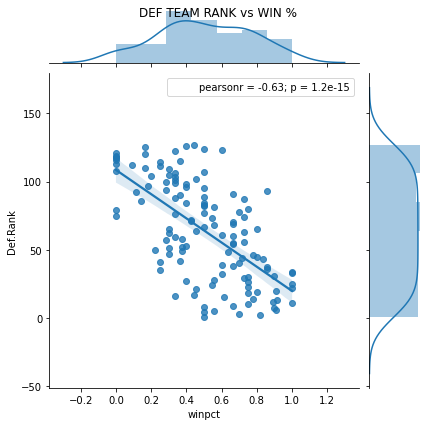

In [9]:
g=sns.jointplot('winpct','Def.Rank',df,kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('DEF TEAM RANK vs WIN %')
plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


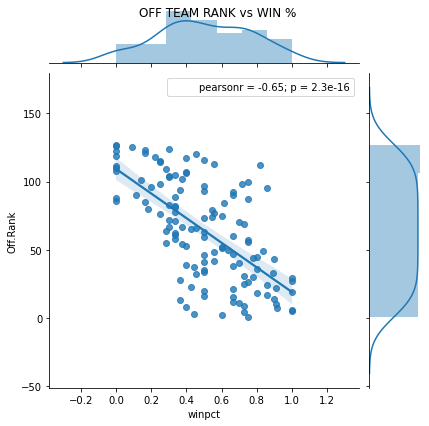

In [10]:
#Regression graph for Offensive Rank and Defensive Rank Vs Win Pct with correlation

#Results show a stronger correlation between Defensive Rank and Win Pct

g=sns.jointplot('winpct','Off.Rank',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('OFF TEAM RANK vs WIN %')
plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


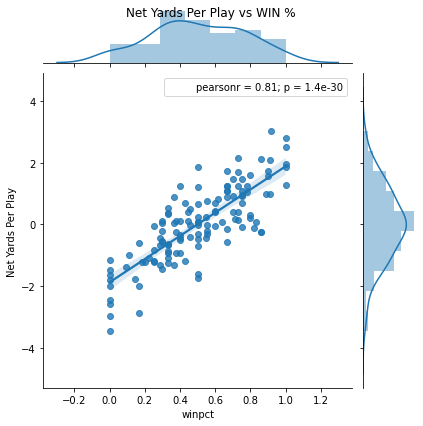

In [11]:
#Regression graph for NYPP Vs Win Pct with correlation

#Results show a stronger correlation between NYPP and Winpct

g=sns.jointplot('winpct','Net Yards Per Play',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('Net Yards Per Play vs WIN %')
plt.show()

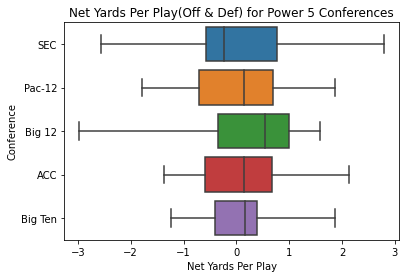

,TS_ID,Team,Season,winpct,Net Yards Per Play
859,860,BYU,2020,0.916667,3.04
845,846,Alabama,2020,1.000000,2.79
863,864,Cincinnati,2020,1.000000,2.50
912,913,North Carolina,2020,0.727273,2.14
858,859,Buffalo,2020,0.857143,2.13
864,865,Clemson,2020,0.909091,2.09
930,931,San Jose St.,2020,1.000000,1.96
848,849,Arizona St.,2020,0.500000,1.87
918,919,Ohio St.,2020,1.000000,1.86
967,968,Western Mich.,2020,0.666667,1.74


In [12]:
filter=df['Conference']== 'ACC'
filter2=df['Conference']== 'SEC'
filter3=df['Conference']== 'Big 12'
filter4=df['Conference']== 'Big Ten' 
filter5=df['Conference']== 'Pac-12'
dfn=df.where(filter | filter2 | filter3 | filter4 | filter5)
sns.boxplot(dfn['Net Yards Per Play'], dfn['Conference'], whis=np.inf)
plt.title('Net Yards Per Play(Off & Def) for Power 5 Conferences')
plt.show()
df[['TS_ID' , 'Team', 'Season', 'winpct', 'Net Yards Per Play']].sort_values('Net Yards Per Play', ascending = False)[0:25]

In [13]:
# Bottom 10 in Avg Rank
df[['Team', 'Season','Off.Rank','Def.Rank','Avg Rank']].sort_values('Avg Rank')[-10:]

,Team,Season,Off.Rank,Def.Rank,Avg Rank
882,Illinois,2020,98,114,106.0
954,UNLV,2020,108,119,113.5
857,Bowling Green,2020,111,117,114.0
844,Akron,2020,121,110,115.5
959,Vanderbilt,2020,110,121,115.5
953,ULM,2020,119,113,116.0
886,Kansas,2020,126,108,117.0
938,Syracuse,2020,125,112,118.5
956,Utah St.,2020,123,120,121.5
897,Massachusetts,2020,127,118,122.5


In [14]:
# Bottom 10 in NYPP. THEY STINK COACH!

# Bottom 10 in Avg Rank
df[['Team', 'Season', 'Win', 'Loss','Net Yards Per Play']].sort_values('Net Yards Per Play', ascending=False)[-10:]

,Team,Season,Win,Loss,Net Yards Per Play
894,LSU,2020,5,5,-1.74
940,Temple,2020,1,6,-1.76
847,Arizona,2020,0,5,-1.79
956,Utah St.,2020,1,5,-1.99
953,ULM,2020,0,10,-2.01
954,UNLV,2020,0,6,-2.44
959,Vanderbilt,2020,0,9,-2.57
844,Akron,2020,1,5,-2.87
886,Kansas,2020,0,9,-2.97
897,Massachusetts,2020,0,4,-3.45
